# Declare library and set up

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from DataProcessing import DataCleaner, del_col
from Visualize import check_coordinates_in_vietnam, visualize_real_estate_price, visualize_real_estate_clusters, visualize_real_estate_price_heatmap # for visualizing the data
import webbrowser

In [3]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# Take an insight from the data

In [4]:
df = pd.read_csv('./datasets/housing.csv', sep='\t')

In [5]:
df.head()

,id,price,area,bedrooms,wc,n_floors,car_place,house_orientation,furniture,facade,legal,street,district,type,date
0,121356,0.79,57,2.0,2.0,NaN,False,NaN,cơ bản,False,sổ đỏ/ sổ hồng,tân kiên,bình chánh,tin thường,11/10/2024
1,121355,0.10,80,19.0,19.0,NaN,False,NaN,nội thất đầy đủ,True,NaN,lê hồng phong,quận 10,tin thường,11/10/2024
2,115827,2.60,16,4.0,3.0,3.0,False,NaN,NaN,False,sổ đỏ/ sổ hồng,lý thường kiệt,quận 10,tin thường,22/07/2024
3,115833,3.00,32,4.0,NaN,5.0,True,NaN,NaN,False,sổ đỏ/ sổ hồng,NaN,quận 6,tin thường,22/07/2024
4,115834,4.60,38,3.0,4.0,3.0,True,NaN,NaN,False,sổ đỏ/ sổ hồng,tân hóa,quận 6,tin thường,22/07/2024


In [6]:
df.describe()

,id,price,area,bedrooms,wc,n_floors
count,9882.000000,9400.000000,9882.000000,7992.000000,7388.000000,6660.000000
mean,101127.517203,6.530529,76.433313,3.411662,3.272198,2.889039
std,12401.134279,6.267264,57.156809,2.818890,2.891326,11.389861
min,80084.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,90005.250000,3.000000,46.000000,2.000000,2.000000,2.000000
50%,101176.500000,5.000000,62.000000,3.000000,3.000000,2.000000
75%,111541.500000,7.600000,88.000000,4.000000,4.000000,3.000000
max,121356.000000,40.000000,500.000000,111.000000,111.000000,902.000000


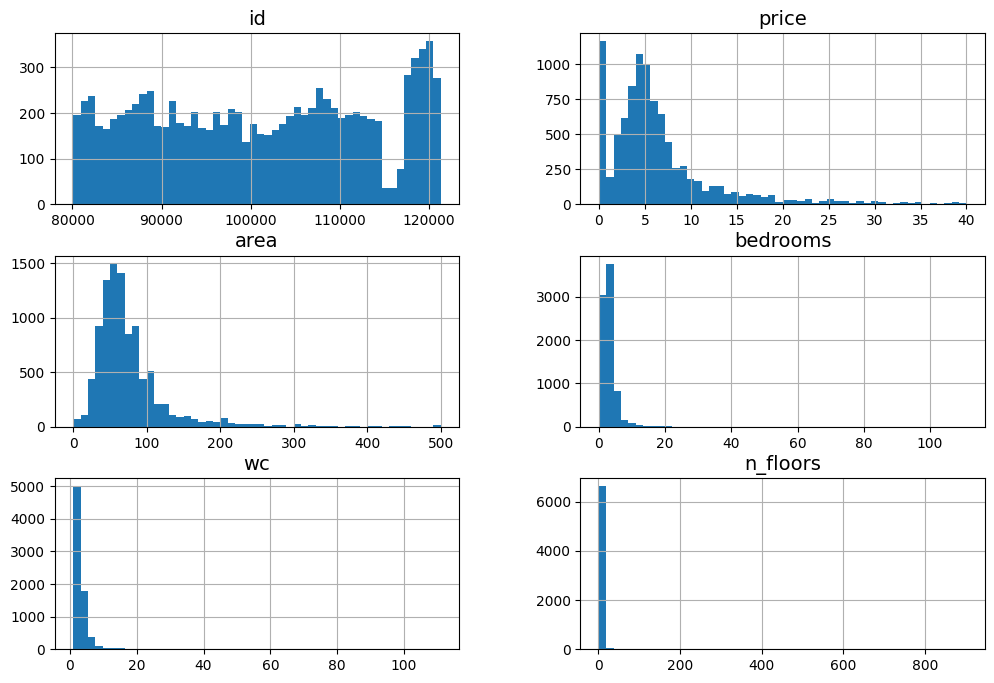

In [7]:
df.hist(bins=50, figsize=(12, 8))
plt.show()

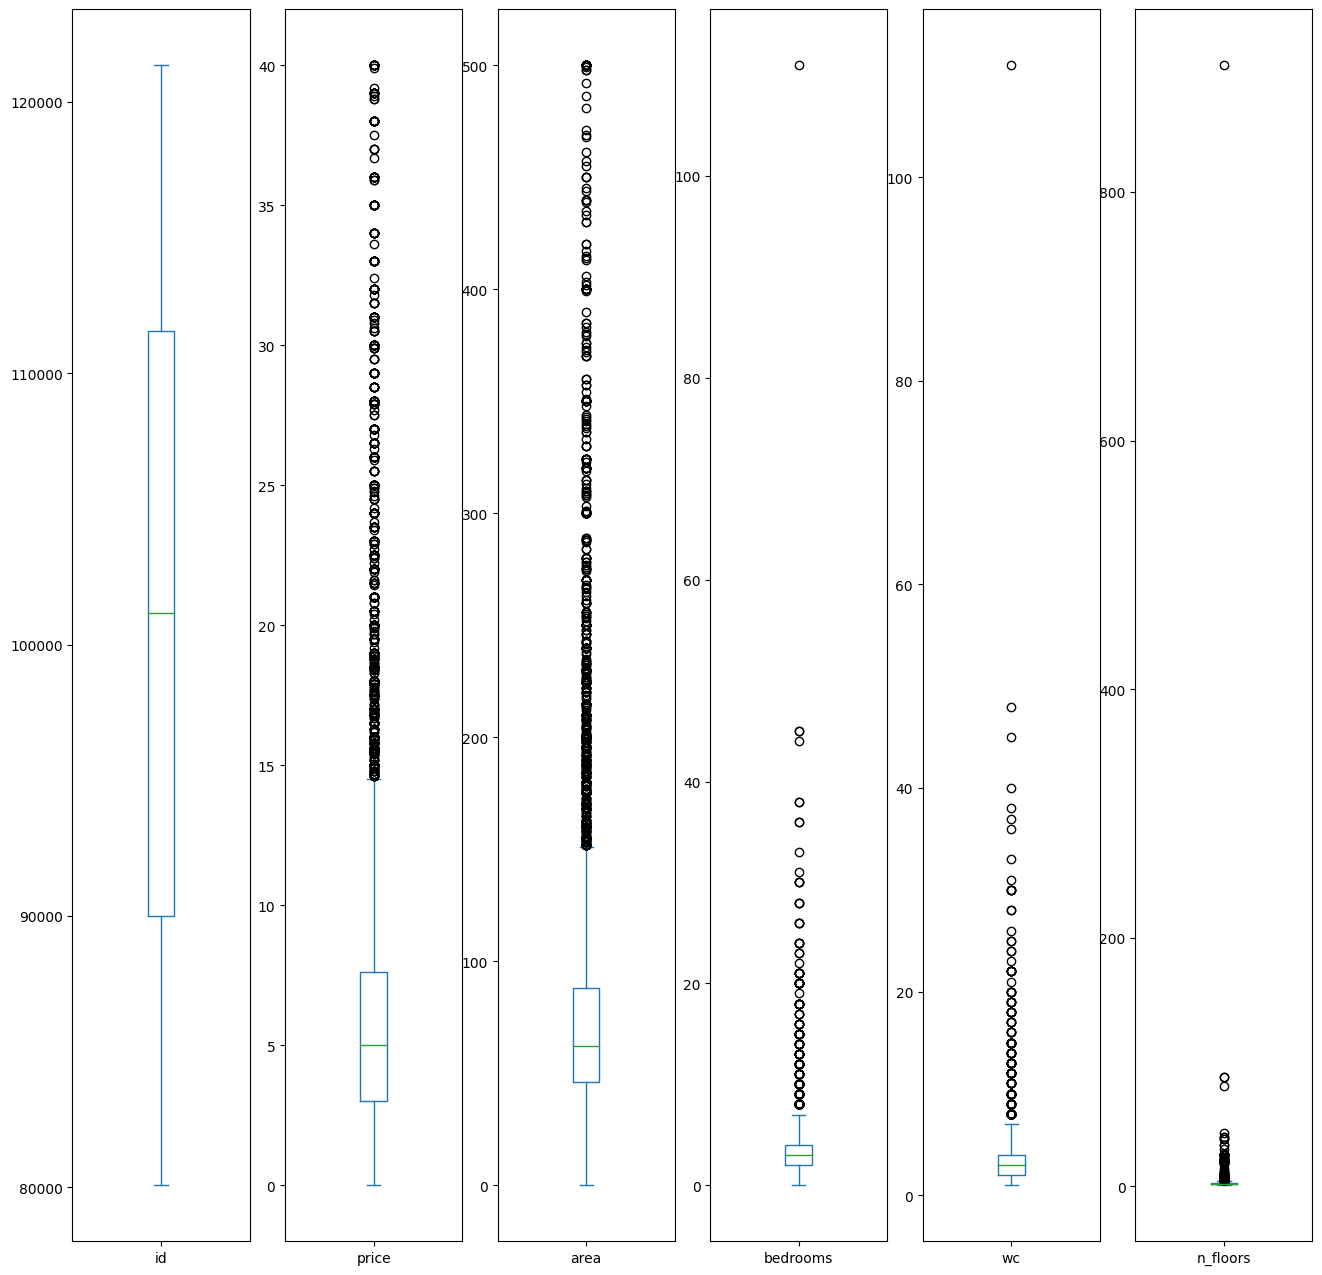

In [8]:
df.plot(kind='box', subplots=True, figsize=(16, 16))
plt.show()

<AxesSubplot: xlabel='car_place', ylabel='price'>

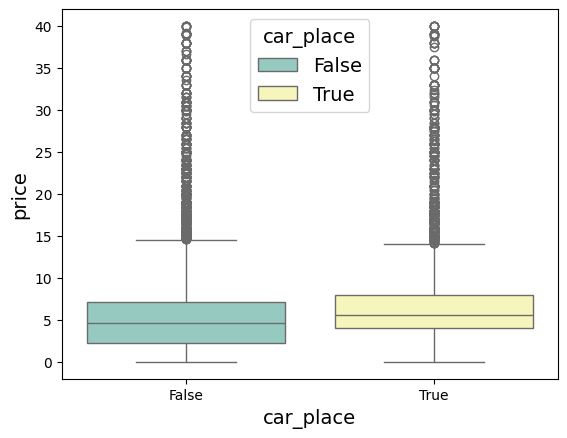

In [9]:
sns.boxplot(x='car_place', y='price', data=df, hue='car_place', palette='Set3')

<AxesSubplot: xlabel='facade', ylabel='price'>

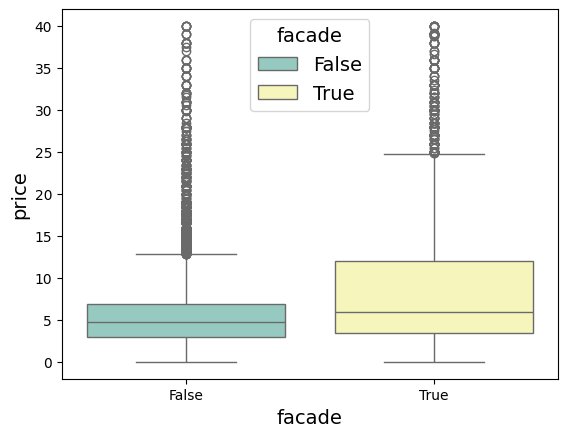

In [10]:
sns.boxplot(x='facade', y='price', data=df, hue='facade', palette='Set3')

<AxesSubplot: xlabel='facade', ylabel='price'>

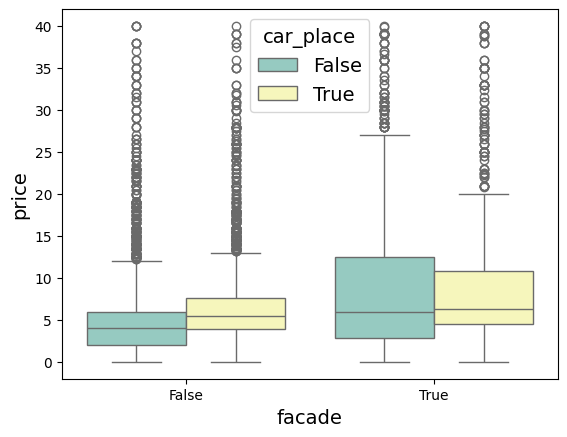

In [11]:
sns.boxplot(x='facade', y='price', data=df, hue='car_place', palette='Set3')

In [12]:
df.isnull().sum() # Check missing values

id                      0
price                 482
area                    0
bedrooms             1890
wc                   2494
n_floors             3222
car_place               0
house_orientation    8609
furniture            9846
facade                  0
legal                8207
street               3970
district                0
type                    0
date                    0
dtype: int64

In [13]:
df_index = df.reset_index().assign(index=lambda x: x["index"] + 1)
df_index.head()

,index,id,price,area,bedrooms,wc,n_floors,car_place,house_orientation,furniture,facade,legal,street,district,type,date
0,1,121356,0.79,57,2.0,2.0,NaN,False,NaN,cơ bản,False,sổ đỏ/ sổ hồng,tân kiên,bình chánh,tin thường,11/10/2024
1,2,121355,0.10,80,19.0,19.0,NaN,False,NaN,nội thất đầy đủ,True,NaN,lê hồng phong,quận 10,tin thường,11/10/2024
2,3,115827,2.60,16,4.0,3.0,3.0,False,NaN,NaN,False,sổ đỏ/ sổ hồng,lý thường kiệt,quận 10,tin thường,22/07/2024
3,4,115833,3.00,32,4.0,NaN,5.0,True,NaN,NaN,False,sổ đỏ/ sổ hồng,NaN,quận 6,tin thường,22/07/2024
4,5,115834,4.60,38,3.0,4.0,3.0,True,NaN,NaN,False,sổ đỏ/ sổ hồng,tân hóa,quận 6,tin thường,22/07/2024


In [14]:
# Convert upload_date column to datetime type
df_index['date'] = pd.to_datetime(df_index['date'], format='%d/%m/%Y')

# Create new columns from upload_date
df_index['year'] = df_index['date'].dt.year
df_index['month'] = df_index['date'].dt.month
df_index['day_of_week'] = df_index['date'].dt.day_name()

# Calculate average price by month
monthly_avg_price = df_index.groupby('month')['price'].mean()

# Count the number of houses listed for sale by year
annual_listings = df_index.groupby('year')['id'].count()

# Analyze by season
def get_season(date):
    if date.month in [12, 1, 2]:
        return 'Winter'
    elif date.month in [3, 4, 5]:
        return 'Spring'
    elif date.month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df_index['season'] = df_index['date'].apply(get_season)
season_avg_price = df_index.groupby('season')['price'].mean()

# Calculate the average price by day of the week
day_of_week_avg_price = df_index.groupby('day_of_week')['price'].mean()

In [15]:
df_index.head()

,index,id,price,area,bedrooms,wc,n_floors,car_place,house_orientation,furniture,facade,legal,street,district,type,date,year,month,day_of_week,season
0,1,121356,0.79,57,2.0,2.0,NaN,False,NaN,cơ bản,False,sổ đỏ/ sổ hồng,tân kiên,bình chánh,tin thường,2024-10-11,2024,10,Friday,Autumn
1,2,121355,0.10,80,19.0,19.0,NaN,False,NaN,nội thất đầy đủ,True,NaN,lê hồng phong,quận 10,tin thường,2024-10-11,2024,10,Friday,Autumn
2,3,115827,2.60,16,4.0,3.0,3.0,False,NaN,NaN,False,sổ đỏ/ sổ hồng,lý thường kiệt,quận 10,tin thường,2024-07-22,2024,7,Monday,Summer
3,4,115833,3.00,32,4.0,NaN,5.0,True,NaN,NaN,False,sổ đỏ/ sổ hồng,NaN,quận 6,tin thường,2024-07-22,2024,7,Monday,Summer
4,5,115834,4.60,38,3.0,4.0,3.0,True,NaN,NaN,False,sổ đỏ/ sổ hồng,tân hóa,quận 6,tin thường,2024-07-22,2024,7,Monday,Summer


In [16]:
monthly_avg_price

month
1     6.333325
2     6.836404
3     7.277846
4     6.653638
5     5.828486
6     4.973640
7     5.695350
8     6.112660
9     7.345705
10    7.330359
11    6.432953
12    5.700822
Name: price, dtype: float64

In [17]:
annual_listings

year
2022    1939
2023    6252
2024    1691
Name: id, dtype: int64

In [18]:
season_avg_price

season
Autumn    7.037355
Spring    6.658690
Summer    5.718584
Winter    6.154737
Name: price, dtype: float64

In [19]:
day_of_week_avg_price

day_of_week
Friday       6.187936
Monday       6.688105
Saturday     6.619671
Sunday       6.854596
Thursday     6.259686
Tuesday      6.662318
Wednesday    6.638285
Name: price, dtype: float64

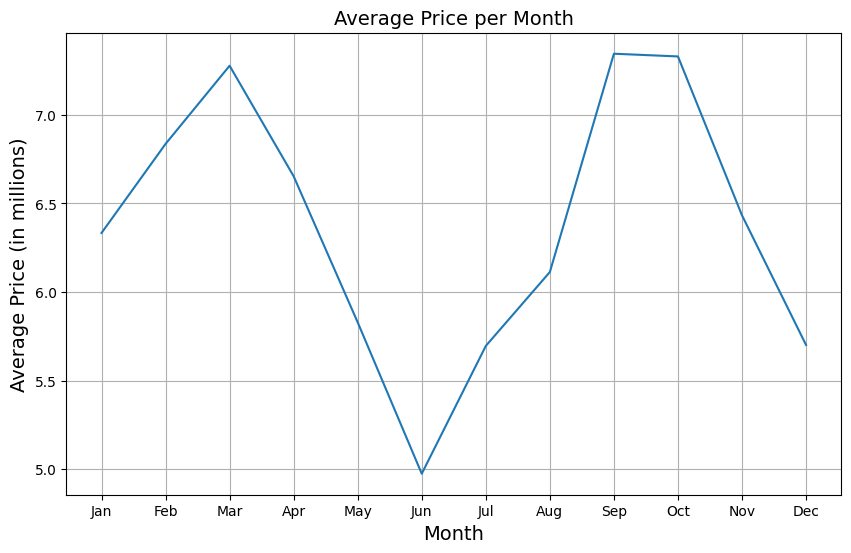

In [20]:
# Create a graph of the average price by month
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_avg_price.index, y=monthly_avg_price.values)
plt.title('Average Price per Month')
plt.xlabel('Month')
plt.ylabel('Average Price (in millions)')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

/tmp/ipykernel_21887/1080880023.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=annual_listings.index, y=annual_listings.values, palette="Blues_d")


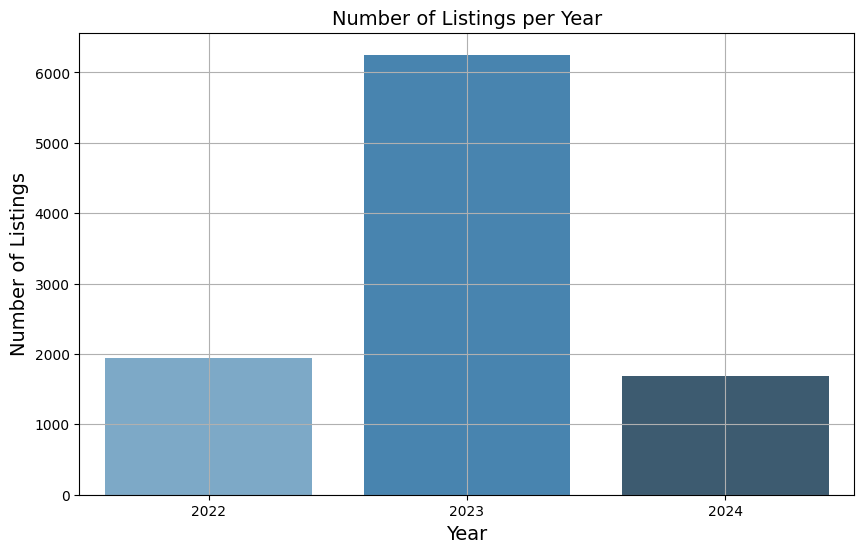

In [21]:
# Create a graph of the number of houses listed for sale by year
plt.figure(figsize=(10, 6))
sns.barplot(x=annual_listings.index, y=annual_listings.values, palette="Blues_d")
plt.title('Number of Listings per Year')
plt.xlabel('Year')
plt.ylabel('Number of Listings')
plt.grid(True)
plt.show()

/tmp/ipykernel_21887/1873409052.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=season_avg_price.index, y=season_avg_price.values, palette="coolwarm")


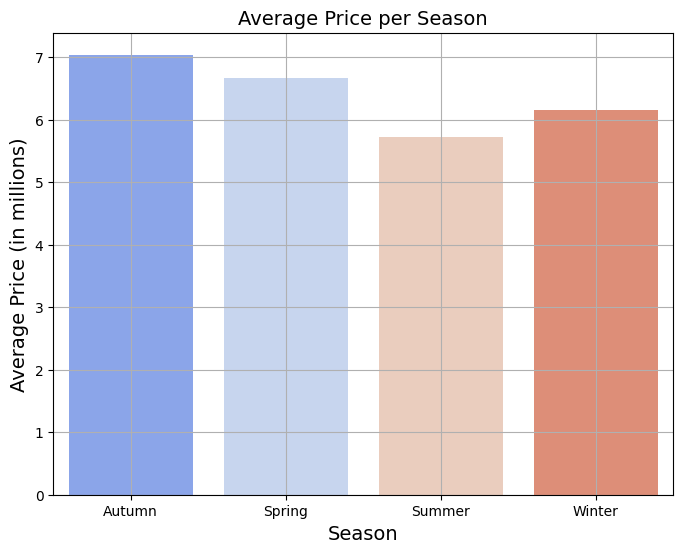

In [22]:
# Create a graph of the average price by season
plt.figure(figsize=(8, 6))
sns.barplot(x=season_avg_price.index, y=season_avg_price.values, palette="coolwarm")
plt.title('Average Price per Season')
plt.xlabel('Season')
plt.ylabel('Average Price (in millions)')
plt.grid(True)
plt.show()

/tmp/ipykernel_21887/324731933.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_of_week_avg_price.index, y=day_of_week_avg_price.values, palette="magma")


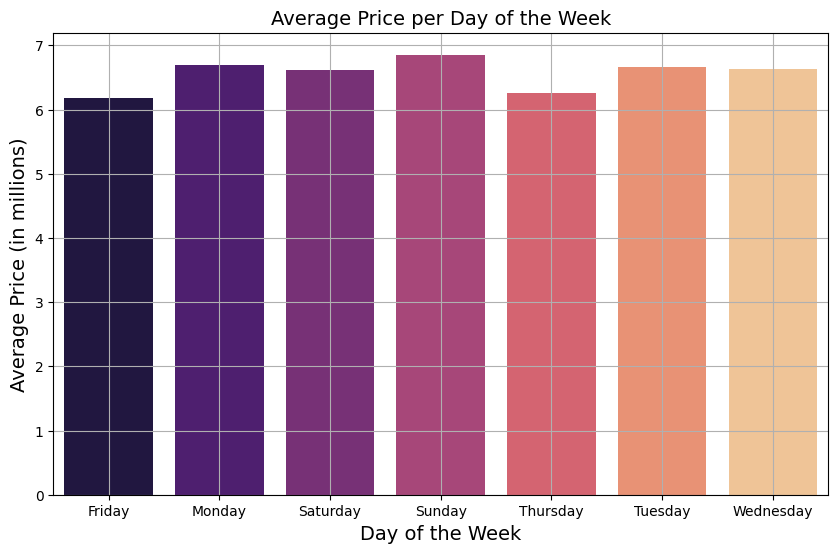

In [23]:
# Create a graph of the average price by day of the week
plt.figure(figsize=(10, 6))
sns.barplot(x=day_of_week_avg_price.index, y=day_of_week_avg_price.values, palette="magma")
plt.title('Average Price per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Price (in millions)')
plt.grid(True)
plt.show()

<AxesSubplot: xlabel='day_of_week', ylabel='price'>

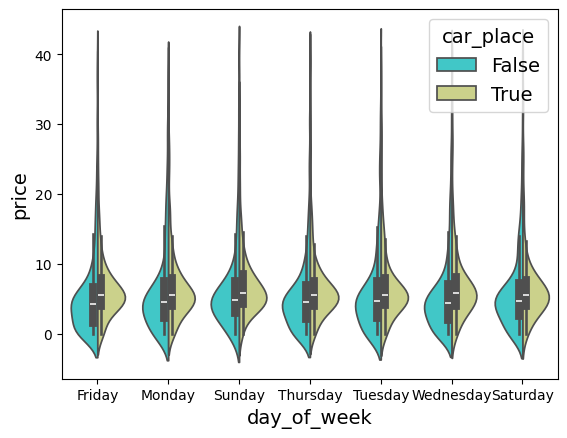

In [24]:
sns.violinplot(x="day_of_week", y="price", data=df_index, hue='car_place', split=True, palette = 'rainbow')

<AxesSubplot: xlabel='day_of_week', ylabel='price'>

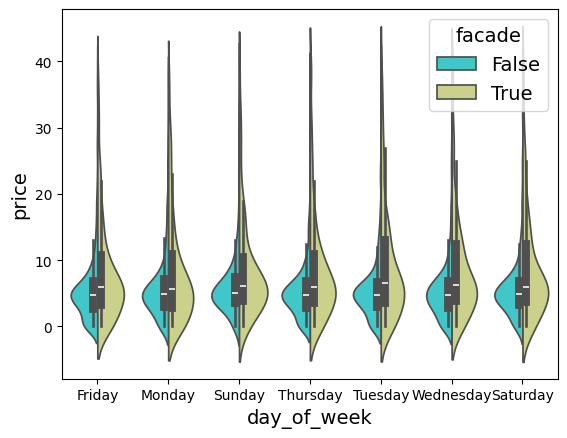

In [25]:
sns.violinplot(x="day_of_week", y="price", data=df_index, hue='facade', split=True, palette = 'rainbow')

# Process and clean-up the data

/home/letruongzzio/python-for-ds-project/EDA & Feature Engineering/DataProcessing.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['address'] = df['street'].fillna('') + ', ' + df['district'].fillna('')
/home/letruongzzio/python-for-ds-project/EDA & Feature Engineering/DataProcessing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['address'] = df['address'].str.replace('^, |, $', '', regex=True)
/home/letruongzzio/python-for-ds-project/EDA & Feature Engineering/DataProcessing.py:143: SettingW

Imputing for column: bedrooms
knn MSE for bedrooms: 2.4709
linear_reg MSE for bedrooms: 2.1670
decision_tree MSE for bedrooms: 2.7513
random_forest MSE for bedrooms: 2.5027
gradient_boosting MSE for bedrooms: 2.3948
Best model for bedrooms: LinearRegression() with MSE: 2.1670
-----------------------------------
Imputing for column: wc
knn MSE for wc: 2.9785
linear_reg MSE for wc: 1.9929
decision_tree MSE for wc: 2.2315
random_forest MSE for wc: 1.8369
gradient_boosting MSE for wc: 2.0964
Best model for wc: RandomForestRegressor(max_depth=10, n_jobs=-1, random_state=42) with MSE: 1.8369
-----------------------------------
Imputing for column: n_floors
knn MSE for n_floors: 4.9727
linear_reg MSE for n_floors: 9.5099
decision_tree MSE for n_floors: 16.0422
random_forest MSE for n_floors: 43.0447
gradient_boosting MSE for n_floors: 6.4767
Best model for n_floors: KNeighborsClassifier(n_neighbors=12,
                     weights=<function DataCleaner.handle_missing_values_by_using_models.<l

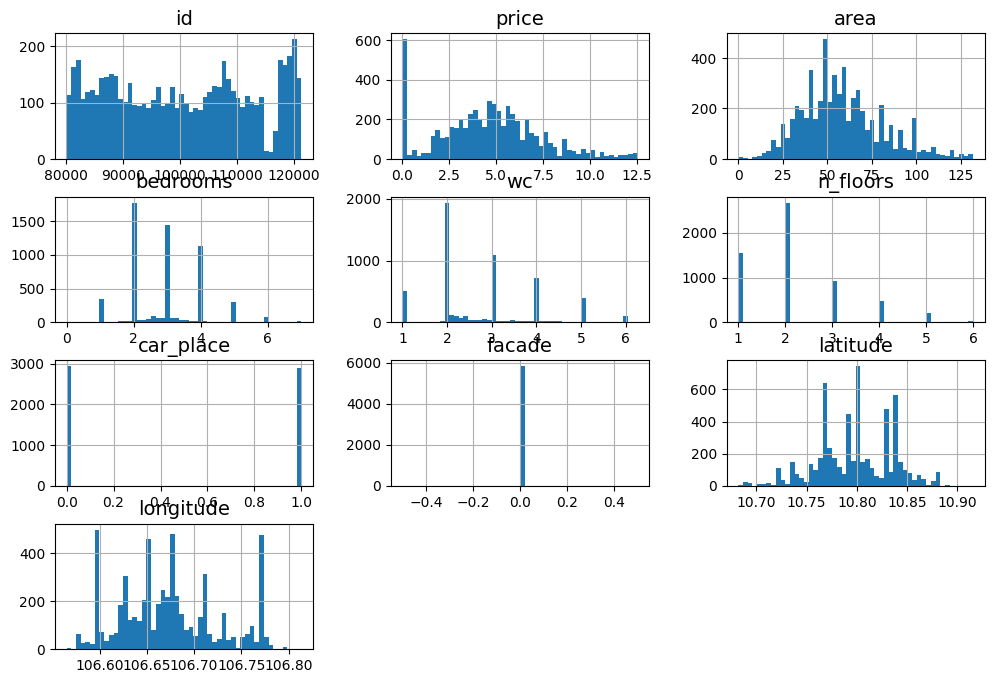

In [26]:
data_cleaner = DataCleaner(api_key="ccc01759bd474d50b77b337c740ed0b7")

df_cleaned = data_cleaner.clean_data(
    df=df,
    target_col='price',
    drop_na_cols=["price", "area"],
    input_cols=['price', 'area', 'car_place', 'facade'],
    cols_to_impute=['bedrooms', 'wc', 'n_floors']
)

df_cleaned.to_csv('datasets/housing_cleaned.csv', index=False)

In [27]:
df_cleaned = del_col(df_cleaned, ['facade'])
df_cleaned.to_csv('./datasets/housing_cleaned.csv', index=False)

In [28]:
data_cleaned = pd.read_csv('./datasets/housing_cleaned.csv')
data_cleaned

,id,price,area,bedrooms,wc,n_floors,car_place,latitude,longitude
0,121356,0.790,57,2.000000,2.000000,1.0,0,10.713820,106.589326
1,115827,2.600,16,4.000000,3.000000,3.0,0,10.767127,106.659121
2,115833,3.000,32,4.000000,2.073390,5.0,1,10.745886,106.639292
3,115834,4.600,38,3.000000,4.000000,3.0,1,10.755020,106.637447
4,115837,3.450,76,4.000000,4.000000,4.0,1,10.867853,106.623154
...,...,...,...,...,...,...,...,...,...
5826,88818,9.500,46,4.000000,4.000000,4.0,1,10.795860,106.681903
5827,86770,1.950,48,2.000000,2.000000,1.0,0,10.710687,106.619353
5828,86258,10.200,56,3.000000,4.000000,3.0,1,10.801764,106.711032
5829,86002,6.200,47,4.000000,5.000000,5.0,1,10.819914,106.698770


# Visualization

In [29]:
housing_cleaned_coordinations = check_coordinates_in_vietnam(shapefile_path='./vietnam_Vietnam_Country_Boundary/extracted_files/vietnam_Vietnam_Country_Boundary.shp', housing_df=data_cleaned)

In [30]:
gmap_1 = visualize_real_estate_price(housing_cleaned_coordinations)
gmap_1.save("foliumVisualizationPrice.html")
webbrowser.open_new_tab('foliumVisualizationPrice.html')

True

/home/letruongzzio/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/letruongzzio/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/letruongzzio/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/letruongzzio/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/le

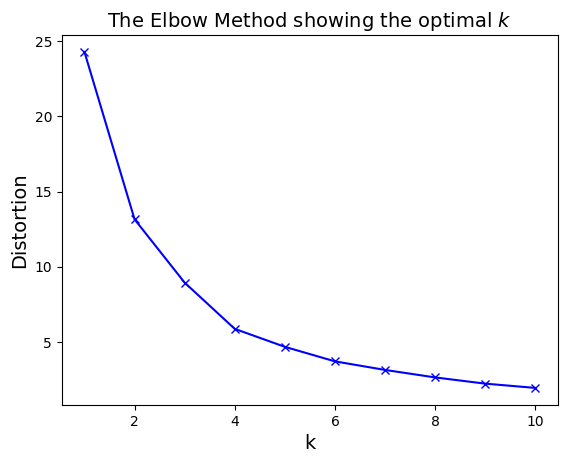

/home/letruongzzio/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


True

In [31]:
gmap_2 = visualize_real_estate_clusters(housing_cleaned_coordinations)
gmap_2.save("foliumVisualizationCluster.html")
webbrowser.open_new_tab('foliumVisualizationCluster.html')

In [32]:
housing_cleaned_coordinations

,id,price,area,bedrooms,wc,n_floors,car_place,latitude,longitude,Cluster,Distance to center 0,Distance to center 1
0,121356,0.790,57,2.000000,2.000000,1.0,0,10.713820,106.589326,0,10.891195,19.324719
1,115827,2.600,16,4.000000,3.000000,3.0,0,10.767127,106.659121,0,3.448010,9.767321
2,115833,3.000,32,4.000000,2.073390,5.0,1,10.745886,106.639292,0,5.493490,12.806600
3,115834,4.600,38,3.000000,4.000000,3.0,1,10.755020,106.637447,0,4.519702,12.487098
4,115837,3.450,76,4.000000,4.000000,4.0,1,10.867853,106.623154,0,8.455995,14.440284
...,...,...,...,...,...,...,...,...,...,...,...,...
5826,88818,9.500,46,4.000000,4.000000,4.0,1,10.795860,106.681903,0,4.011851,6.374134
5827,86770,1.950,48,2.000000,2.000000,1.0,0,10.710687,106.619353,0,9.785357,16.850590
5828,86258,10.200,56,3.000000,4.000000,3.0,1,10.801764,106.711032,1,7.232007,3.127935
5829,86002,6.200,47,4.000000,5.000000,5.0,1,10.819914,106.698770,1,6.477560,4.699220


In [33]:
gmap_3 = visualize_real_estate_price_heatmap(housing_cleaned_coordinations)
gmap_3.save("foliumVisualizationHeatmap.html")
webbrowser.open_new_tab('foliumVisualizationHeatmap.html')

/home/letruongzzio/python-for-ds-project/EDA & Feature Engineering/Visualize.py:274: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  HeatMap(


True

# Feature Selection

## VarianceThreshold

In [34]:
from sklearn.feature_selection import VarianceThreshold

X, y = housing_cleaned_coordinations.drop('price', axis=1), housing_cleaned_coordinations['price']

# Threshold = 0.1 (removes features with less than 10% variance)
selector = VarianceThreshold(threshold=0.1)
X_kvar = selector.fit_transform(X)
selected_columns = X.columns[selector.get_support()]  # Get columns with variance greater than threshold
print(selected_columns)

Index(['id', 'area', 'bedrooms', 'wc', 'n_floors', 'car_place', 'Cluster',
       'Distance to center 0', 'Distance to center 1'],
      dtype='object')


## SelectKBest

In [35]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import VarianceThreshold

# Use f_regression for regression problems
X_kbest = SelectKBest(f_regression, k=5).fit_transform(X, y)

print('Selected columns after applying SelectKBest:', X.columns[SelectKBest(f_regression, k=5).fit(X, y).get_support()])

Selected columns after applying SelectKBest: Index(['bedrooms', 'wc', 'n_floors', 'car_place', 'Distance to center 0'], dtype='object')


## Mutual Information (MI)

In [36]:
from sklearn.feature_selection import mutual_info_regression

# Assuming X and y are already defined
mi = mutual_info_regression(X, y)

# Normalize the scores for comparison
mi_normalized = mi / mi.max()

# Create a DataFrame to store the scores
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Mutual Information': mi_normalized
})

# Sort features by Mutual Information in descending order
feature_scores = feature_scores.sort_values(by='Mutual Information', ascending=False)

# Select the top_k features based on Mutual Information
top_k_mi = 5  # Define the number of top features you want to select
top_features = set(feature_scores.head(top_k_mi)['Feature'].tolist())

print(top_features)

{'Distance to center 0', 'latitude', 'wc', 'bedrooms', 'Distance to center 1'}


## Use of GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Define the parameter grid to search for the best parameters
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the RandomForest model
rf = RandomForestRegressor(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Fit the model
grid_search.fit(X, y)

# Output the best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best score (negative MSE): ", -grid_search.best_score_)

# Use the best estimator
best_model = grid_search.best_estimator_

# Evaluate using cross-validation on the best model
mse_best = cross_val_score(best_model, X, y, scoring='neg_mean_squared_error', cv=5).mean()
print('MSE with best model:', -mse_best)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   3.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   3.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   3.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   3.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   3.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   7.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   7.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   7.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   3.1s
[CV] END max_dept

In [ ]:
for col in X.columns:
    print(f"{col}: {best_model.feature_importances_[X.columns.get_loc(col)]}")

id: 0.0929387363740693
area: 0.16166346047574368
bedrooms: 0.09137136922181854
wc: 0.36146322967438793
n_floors: 0.03905496700552482
car_place: 0.020482281172774886
latitude: 0.055485304951903375
longitude: 0.0425910603688488
Cluster: 0.0009709008765686273
Distance to center 0: 0.05543350423025281
Distance to center 1: 0.07854518564810725


## Use of RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter distribution
param_dist = {
    'n_estimators': np.arange(50, 201, 50),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 5)
}

# Initialize the RandomForest model
rf = RandomForestRegressor(random_state=42)

# Use RandomizedSearchCV to search over the parameter space
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, 
                                   n_iter=20, cv=5, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1)

# Fit the model
random_search.fit(X, y)

# Output the best parameters and score
print("Best parameters found: ", random_search.best_params_)
print("Best score (negative MSE): ", -random_search.best_score_)

# Use the best model from random search
best_model_random = random_search.best_estimator_

# Evaluate the best model using cross-validation
mse_best_random = cross_val_score(best_model_random, X, y, scoring='neg_mean_squared_error', cv=5).mean()
print('MSE with best random search model:', -mse_best_random)

/Users/hoaho/.pyenv/versions/3.13.0/lib/python3.13/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters found:  {'n_estimators': np.int64(150), 'min_samples_split': np.int64(2), 'min_samples_leaf': np.int64(2), 'max_depth': 30}
Best score (negative MSE):  2.8203427815496713
MSE with best random search model: 2.8203427815496713


In [ ]:
print("Feature Importances:")
for col in X.columns:
    print(f"{col}: {best_model_random.feature_importances_[X.columns.get_loc(col)]}")

Feature Importances:
id: 0.09261421743625706
area: 0.1618757465102772
bedrooms: 0.09250090389161265
wc: 0.3615603667027046
n_floors: 0.038810754688151865
car_place: 0.020080871180090477
latitude: 0.05578972070743495
longitude: 0.04318122714050373
Cluster: 0.0008897133300754471
Distance to center 0: 0.05459280828699985
Distance to center 1: 0.07810367012589219


# Create training and testing data

In [ ]:
housing_final = pd.read_csv('./datasets/housing_final_features_with_price.csv')

<Axes: >

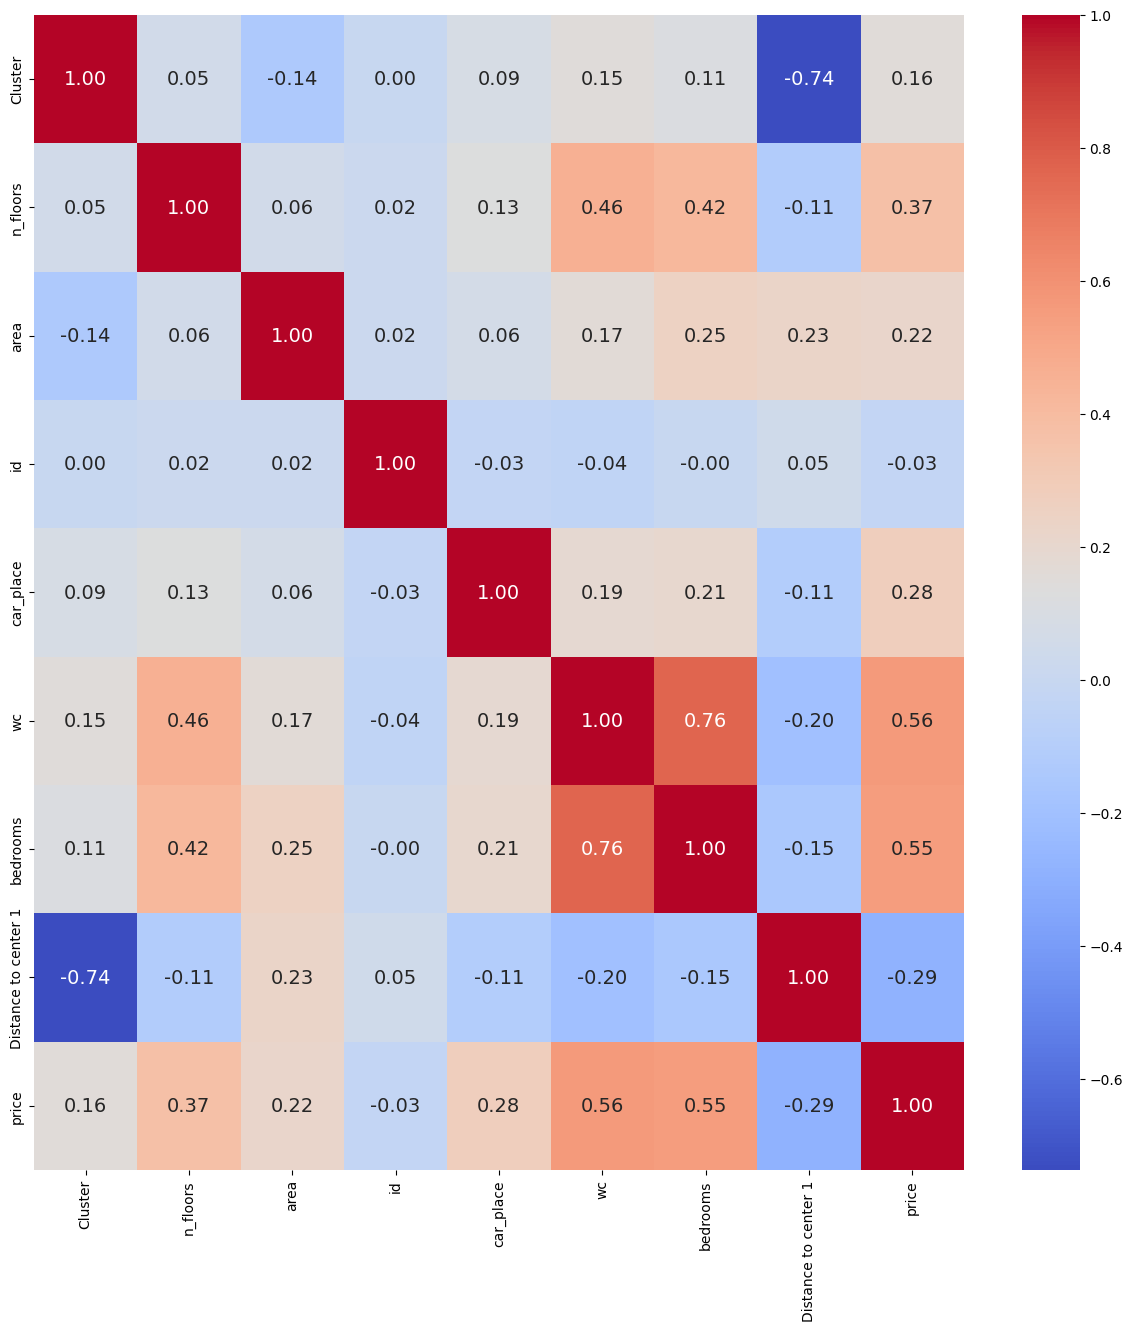

In [ ]:
corr_matrix = housing_final.corr(numeric_only=True)
corr_matrix['price'].sort_values(ascending=False)
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

In [ ]:
housing_final["bedrooms_category"] = pd.qcut(housing_final["bedrooms"], q=4, labels=False)

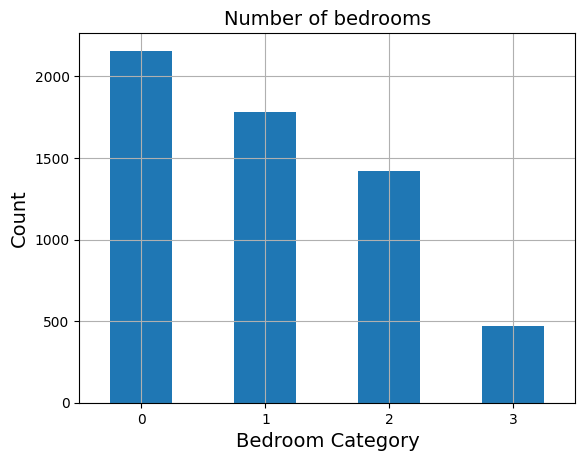

In [ ]:
housing_final["bedrooms_category"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.title("Number of bedrooms")
plt.xlabel("Bedroom Category")
plt.ylabel("Count")
plt.show()

In [ ]:
housing_final

,Cluster,n_floors,area,id,car_place,wc,bedrooms,Distance to center 1,price,bedrooms_category,wc_category
0,1,1.0,57,121356,0,2.000000,2.000000,10.874742,0.790,0,0
1,1,3.0,16,115827,0,3.000000,4.000000,3.401934,2.600,2,2
2,1,5.0,32,115833,1,2.069591,4.000000,5.458846,3.000,2,1
3,1,3.0,38,115834,1,4.000000,3.000000,4.487381,4.600,1,3
4,1,4.0,76,115837,1,4.000000,4.000000,8.500217,3.450,2,3
...,...,...,...,...,...,...,...,...,...,...,...
5828,1,4.0,46,88818,1,4.000000,4.000000,2.876457,9.500,2,3
5829,1,1.0,48,86770,0,2.000000,2.000000,9.774195,1.950,0,0
5830,0,3.0,56,86258,1,4.000000,3.000000,7.209409,10.200,1,3
5831,0,5.0,47,86002,1,5.000000,4.000000,6.469803,6.200,2,3


In [ ]:
train_set, test_set = train_test_split(housing_final, test_size=0.2, stratify=housing_final["bedrooms_category"], random_state=42)

In [ ]:
for set_ in (train_set, test_set):
    set_.drop(["bedrooms_category"], axis=1, inplace=True)
    set_.drop(["wc_category"], axis=1, inplace=True)

train_set.to_csv('datasets/housing_train.csv', index=False)
test_set.to_csv('datasets/housing_test.csv', index=False)